# Face Generation using Pytorch Pre-trained Model

Pytorch Hub is a pre-trained model repository designed to facilitate research reproducibility. 

Using TorchNet in Analytics-Zoo, we can easily load these pre-trained model and make distributed inference with only a few lines of code change.

Here is an easy example to load Pytorch pretrained [Progressive Growing of GANs (PGAN)](https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/) from Pytorch Hub to Analytics-Zoo, and generate a few faces with TorchNet.

### Load pretrained model from Pytorch Hub
Load [Progressive Growing of GANs (PGAN)](https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/) from Pytorch Hub.

In [1]:
import torch
use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)
# this model outputs 256 x 256 pixel images
# model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
#                        'PGAN', model_name='celebAHQ-256',
#                        pretrained=True, useGPU=use_gpu)

Using cache found in /home/xin/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


### Generate noise with model's build-in method

In [2]:
num_images = 4
noise, _ = model.buildNoiseData(num_images)

### Initialize Analytics-Zoo

In [3]:
from zoo.common.nncontext import init_nncontext
from zoo.pipeline.api.net.torch_net import TorchNet
import numpy as np
sc = init_nncontext("PGAN Inference Example")

### Load Generation Network to TorchNet

In [4]:
net = TorchNet.from_pytorch(model.netG, noise.numpy().shape)

/home/xin/.local/lib/python3.6/site-packages/torch/jit/__init__.py:702: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the Python function. Detailed error:
Not within tolerance rtol=1e-05 atol=1e-05 at input[3, 2, 28, 439] (0.11019206792116165 vs. 0.11024228483438492) and 2273 other locations (0.00%)
  _check_trace([example_inputs], func, executor_options, traced, check_tolerance, _force_outplace)


creating: createTorchNet


### Run Generation using TorchNet

In [5]:
result = net.predict(noise.numpy())
generated_images=result.collect()

### Show Image with Matplotlib and Torchvision

In [6]:
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(torch.Tensor(generated_images).clamp(min=-1, max=1), scale_each=True, normalize=True)

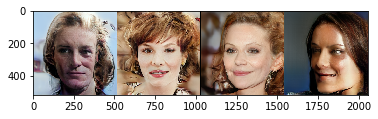

In [7]:
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())